# Subimagenes

Carga de imagenes, librerias y funciones adicionales

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install tqdm

In [2]:
from tqdm import tqdm

In [7]:
imgprueba = cv.imread('Escena1/Foto100.jpg')

In [4]:
imgprueba.shape

(3648, 5472, 3)

In [5]:
imgprueba = cv.imread('Escena1/Foto100.jpg',0)

In [6]:
imgprueba.shape

(3648, 5472)

Constantes

In [13]:
num_sub_images = nx*ny

In [8]:
nx = imgprueba.shape[1]
ny = imgprueba.shape[0]
channels = imgprueba.shape[2]
k_x = 2
k_y = 2

In [9]:
def plot_single_image(image):
    #CLAVE, opencv carga en GBR y plt plotea en RGB
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    return

In [10]:
import os, os.path

def load(folder_name, num = 1):
    base = folder_name +"%d.jpg"
    print(base%num)
    images = []
    while os.path.isfile(base % num):
        images.append(cv.imread(base % num))
        num += 1
    return images

In [37]:
def load_gs(folder_name, num = 1):
    base = folder_name +"%d.jpg"
    print(base%num)
    images = []
    while os.path.isfile(base % num):
        images.append(cv.imread(base % num,0))
        num += 1
    return images

In [11]:
def create_EIA(images,k_x,k_y):
    ''' Entrada:
        images: list with images in order (see paper), each image of shape (ny,nx)
        k_x: number of elemental images in x axis
        k_y: number of elemental images in y axis
        Salida:
        EIA: Elemental Image Array, shape (nyk_y,nxk_x)
    '''
    indice = 2 #ya voy a gastar 2
    fila_1 = np.hstack((images[0],images[1]))
    first = True
    
    for x in range(2,k_x):
        fila_1 = np.hstack((fila_1,images[x]))
        indice = indice + 1
    for y in tqdm(range(k_y-1)): #ya forme una fila
        images_for_row = images[indice:indice+k_x]
        fila_i = np.hstack((images_for_row[0],images_for_row[1]))
        indice = indice + 2 
        for i in range(2,k_x):
            fila_i = np.hstack((fila_i,images_for_row[i]))
            indice = indice + 1
        if first:
            EIA = np.vstack((fila_1,fila_i))
            first = False
        else:
            EIA = np.vstack((EIA,fila_i))
    return EIA

In [12]:
def create_SIA(images,k_x,k_y):
    ''' Entrada:
        images: list with images in order (see paper), each image of shape (ny,nx)
        k_x: number of sub images in x axis
        k_y: number of sub images in y axis
        Salida:
        SIA: Sub Image Array, shape (nyk_y,nxk_x)
    '''
    indice = 2 #ya voy a gastar 2
    fila_1 = np.hstack((images[0],images[1]))
    first = True
    
    for x in range(2,k_x):
        fila_1 = np.hstack((fila_1,images[x]))
        indice = indice + 1
    for y in tqdm(range(k_y-1)): #ya forme una fila
        images_for_row = images[indice:indice+k_x]
        fila_i = np.hstack((images_for_row[0],images_for_row[1]))
        indice = indice + 2 
        for i in range(2,k_x):
            fila_i = np.hstack((fila_i,images_for_row[i]))
            indice = indice + 1
        if first:
            EIA = np.vstack((fila_1,fila_i))
            first = False
        else:
            EIA = np.vstack((EIA,fila_i))
    return EIA

In [27]:
def numerador(filas=30,columnas=0):
    """""
        Filas: cantidad de filas que quiero incluir
        Columnas: cantidad de columnas que quiero incluir
        Numeracion: array con la numeracion correspondiente
    """""
    inicio = np.array([0,61,62,123,124,185,186,247])
    suma = np.array([1,-1,1,-1,1,-1,1,-1])
    if columnas !=0:
        inicio = inicio[:columnas-1]
        suma = suma[:columnas-1]
    segunda = inicio + suma
    numeracion = np.hstack((inicio,segunda))
    for i in range(filas-1):
        numeracion = np.hstack((numeracion,segunda + suma))
        segunda = segunda + suma
    return numeracion

In [28]:
numerador(4,4)

array([ 0, 61, 62,  1, 60, 63,  2, 59, 64,  3, 58, 65,  4, 57, 66])

In [19]:
print(numeracion)

[  0  61  62 123 124 185 186 247   1  60  63 122 125 184 187 246   2  59
  64 121 126 183 188 245   3  58  65 120 127 182 189 244   4  57  66 119
 128 181 190 243   5  56  67 118 129 180 191 242   6  55  68 117 130 179
 192 241   7  54  69 116 131 178 193 240   8  53  70 115 132 177 194 239
   9  52  71 114 133 176 195 238  10  51  72 113 134 175 196 237  11  50
  73 112 135 174 197 236  12  49  74 111 136 173 198 235  13  48  75 110
 137 172 199 234  14  47  76 109 138 171 200 233  15  46  77 108 139 170
 201 232  16  45  78 107 140 169 202 231  17  44  79 106 141 168 203 230
  18  43  80 105 142 167 204 229  19  42  81 104 143 166 205 228  20  41
  82 103 144 165 206 227  21  40  83 102 145 164 207 226  22  39  84 101
 146 163 208 225  23  38  85 100 147 162 209 224  24  37  86  99 148 161
 210 223  25  36  87  98 149 160 211 222  26  35  88  97 150 159 212 221
  27  34  89  96 151 158 213 220  28  33  90  95 152 157 214 219  29  32
  91  94 153 156 215 218  30  31  92  93 154 155 21

Primer acercamiento

In [8]:
imagenes_test = load('Foto')

Foto1.jpg


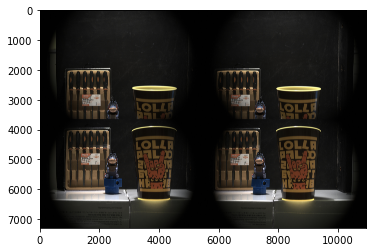

In [9]:
EIA = create_EIA(imagenes_test,2,2)
plot_single_image(EIA)

In [38]:
print(nx,ny)

5472 3648


In [39]:
SIA = np.zeros((k_y*ny,k_x*nx,channels,channels))
SIAs = []
EI_y = -1
for SI_i in tqdm(range(num_sub_images)):
    #for color in range(channels):
    SI = np.zeros((k_y,k_x,channels))
    indice_de_ei = 0
    EI_x = SI_i%nx
    if EI_x == 0:
        EI_y = EI_y + 1
    for x in range(k_x):
        for y in range(k_y):
            SI[x,y,] = imagenes_test[indice_de_ei][EI_y,EI_x,]
            indice_de_ei = indice_de_ei + 1
        #EI_x = -1 #Cada color quiero que arranque de 0 el x que busca 
    #print(SI)
    SIAs.append(SI)

100%|██████████████████████████████████████████████████████████████████| 19961856/19961856 [02:27<00:00, 135761.77it/s]


In [109]:
SIA_tot = create_SIA(SIAs[1*5472:3001*5472],5472,3000)

100%|██████████████████████████████████████████████████████████████████████████████| 2999/2999 [27:13<00:00,  1.84it/s]


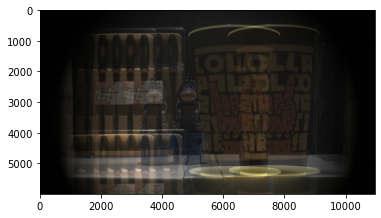

In [111]:
plot_single_image(SIA_tot.astype('uint8'))

In [112]:
SIA_tot.shape

(6000, 10944, 3)

In [113]:
cv.imwrite('SIA_final_con_cuatro.jpg',SIA_tot)

True

In [115]:
SIA_total = create_SIA(SIAs,nx,ny)

100%|██████████████████████████████████████████████████████████████████████████████| 3647/3647 [38:47<00:00,  1.57it/s]


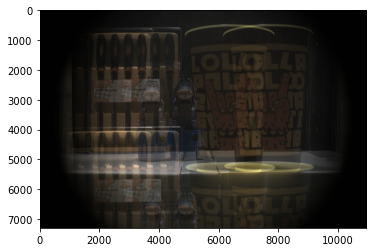

In [116]:
plot_single_image(SIA_total.astype('uint8'))

In [ ]:
cv.imwrite('SIA_final_con_cuatrototal.jpg',SIA_total)

Mas imagenes (10x10)

In [13]:
img0 = cv.imread('Escena4/Foto0.jpg')
imagenes_cargadas = load('Escena4/Foto',)
imagenes = [img0] + imagenes_cargadas

Escena4/Foto1.jpg


In [14]:
len(imagenes)

290

In [15]:
len(imagenes_cargadas)

289

In [16]:
imagenes = imagenes[:65]

In [11]:
inicio = np.array([0,61,62])#,123])#,124,185])#,186,247])
suma = np.array([1,-1,1])#,-1])#,1,-1])#1,-1])
segunda = inicio + suma
numeracion = np.hstack((inicio,segunda))
for i in range(1):
    numeracion = np.hstack((numeracion,segunda + suma))
    segunda = segunda + suma

In [12]:
numeracion

array([ 0, 61, 62,  1, 60, 63,  2, 59, 64])

In [17]:
imagenes_ord = []
for num_imagen in numeracion:
    imagenes_ord.append(imagenes[num_imagen])

In [18]:
len(imagenes_ord)

9

In [19]:
del(imagenes)
del(imagenes_cargadas)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:13<00:00,  6.80s/it]


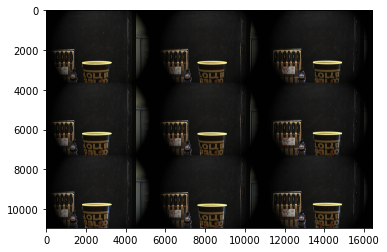

In [20]:
EIA_tot = create_EIA(imagenes_ord,3,3)
plot_single_image(EIA_tot)

In [21]:
del(EIA_tot)

In [24]:
k_x = 3
k_y = 3
SIA = np.zeros((k_y*ny,k_x*nx,channels,channels))
SIAs = []
EI_y = -1
for SI_i in tqdm(range(num_sub_images)):
    #for color in range(channels):
    SI = np.zeros((k_y,k_x,channels))
    indice_de_ei = 0
    EI_x = SI_i%nx
    if EI_x == 0:
        EI_y = EI_y + 1
    for x in range(k_x):
        for y in range(k_y):
            SI[x,y,] = imagenes_ord[indice_de_ei][EI_y,EI_x,]
            indice_de_ei = indice_de_ei + 1
        #EI_x = -1 #Cada color quiero que arranque de 0 el x que busca 
    #print(SI)
    SIAs.append(SI)

100%|███████████████████████████████████████████████████████████████████| 19961856/19961856 [04:42<00:00, 70729.83it/s]


In [25]:
SIA_total = create_SIA(SIAs,nx,ny)

100%|████████████████████████████████████████████████████████████████████████████| 3647/3647 [1:43:23<00:00,  1.70s/it]


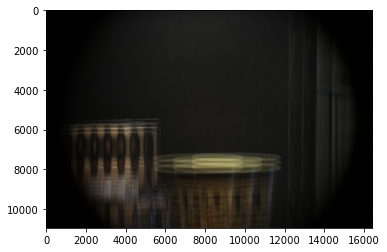

In [26]:
plot_single_image(SIA_total.astype('uint8'))

In [27]:
cv.imwrite('SIA_3x3.jpg',SIA_total)

True

Intento con 4

In [10]:
img0 = cv.imread('Escena4/Foto0.jpg')
imagenes_cargadas = load('Escena4/Foto',)
imagenes = [img0] + imagenes_cargadas

Escena4/Foto1.jpg


In [11]:
len(imagenes)

290

In [14]:
inicio = np.array([0,61,62,123])#,123])#,124,185])#,186,247])
suma = np.array([1,-1,1,-1])#,-1])#,1,-1])#1,-1])
segunda = inicio + suma
numeracion = np.hstack((inicio,segunda))
for i in range(2):
    numeracion = np.hstack((numeracion,segunda + suma))
    segunda = segunda + suma

In [15]:
numeracion

array([  0,  61,  62, 123,   1,  60,  63, 122,   2,  59,  64, 121,   3,
        58,  65, 120])

In [ ]:
imagenes = imagenes[:124]

In [16]:
imagenes_ord = []
for num_imagen in numeracion:
    imagenes_ord.append(imagenes[num_imagen])

In [17]:
len(imagenes_ord)

16

In [18]:
del(imagenes)
del(imagenes_cargadas)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:27<00:00,  9.28s/it]


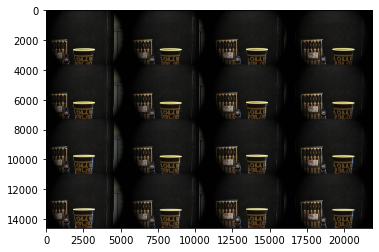

In [19]:
EIA_tot = create_EIA(imagenes_ord,4,4)
plot_single_image(EIA_tot)

In [20]:
del(EIA_tot)

In [24]:
k_x = 4
k_y = 4
#SIA = np.zeros((k_y*ny,k_x*nx,channels,channels))
SIAs = []
EI_y = -1
for SI_i in tqdm(range(num_sub_images)):
    #for color in range(channels):
    SI = np.zeros((k_y,k_x,channels))
    indice_de_ei = 0
    EI_x = SI_i%nx
    if EI_x == 0:
        EI_y = EI_y + 1
    for x in range(k_x):
        for y in range(k_y):
            SI[x,y,] = imagenes_ord[indice_de_ei][EI_y,EI_x,]
            indice_de_ei = indice_de_ei + 1
        #EI_x = -1 #Cada color quiero que arranque de 0 el x que busca 
    #print(SI)
    SIAs.append(SI)

100%|███████████████████████████████████████████████████████████████████| 19961856/19961856 [12:22<00:00, 26884.36it/s]


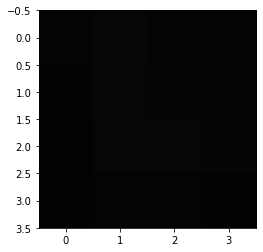

In [30]:
plot_single_image(SIAs[].astype('uint8'))

In [37]:
SIA_total = create_SIA(SIAs[:int(5472*2000)],nx,2000)

 55%|███████████████████████████████████████████                                   | 1105/1999 [44:51<36:17,  2.44s/it]


MemoryError: Unable to allocate 2.17 GiB for an array with shape (4428, 21888, 3) and data type float64

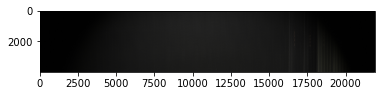

In [36]:
plot_single_image(SIA_total.astype('uint8'))

In [ ]:
del(SIAs)

# Grayscale

In [46]:
img0 = cv.imread('Escena4/Foto0.jpg',0)
imagenes_cargadas = load_gs('Escena4/Foto')
imagenes = [img0] + imagenes_cargadas

Escena4/Foto1.jpg


In [47]:
inicio = np.array([0,61,62,123])#,123])#,124,185])#,186,247])
suma = np.array([1,-1,1,-1])#,-1])#,1,-1])#1,-1])
segunda = inicio + suma
numeracion = np.hstack((inicio,segunda))
for i in range(2):
    numeracion = np.hstack((numeracion,segunda + suma))
    segunda = segunda + suma

In [48]:
imagenes = imagenes[:124]

In [49]:
imagenes_ord = []
for num_imagen in numeracion:
    imagenes_ord.append(imagenes[num_imagen])

In [50]:
del(imagenes)
del(imagenes_cargadas)

In [51]:
imagenes_ord[1].shape

(3648, 5472)

In [55]:
EIA_tot = create_EIA(imagenes_ord,4,4)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.86it/s]


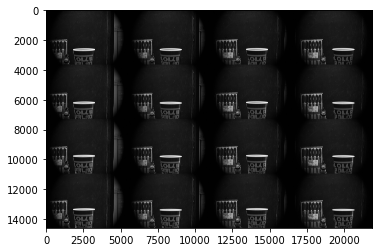

In [56]:
plt.imshow(EIA_tot,cmap = 'gray')

In [57]:
del(EIA_tot)

In [59]:
k_x = 4
k_y = 4
#SIA = np.zeros((k_y*ny,k_x*nx,channels,channels))
SIAs = []
EI_y = -1
for SI_i in tqdm(range(num_sub_images)):
    #for color in range(channels):
    SI = np.zeros((k_y,k_x))
    indice_de_ei = 0
    EI_x = SI_i%nx
    if EI_x == 0:
        EI_y = EI_y + 1
    for x in range(k_x):
        for y in range(k_y):
            SI[x,y] = imagenes_ord[indice_de_ei][EI_y,EI_x]
            indice_de_ei = indice_de_ei + 1
        #EI_x = -1 #Cada color quiero que arranque de 0 el x que busca 
    #print(SI)
    SIAs.append(SI)

100%|███████████████████████████████████████████████████████████████████| 19961856/19961856 [05:01<00:00, 66235.55it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 3647/3647 [42:42<00:00,  1.42it/s]


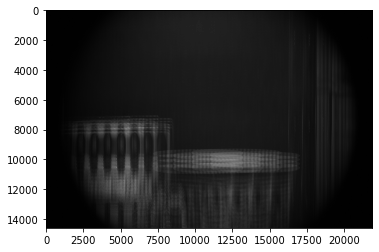

In [60]:
SIA_total = create_SIA(SIAs,nx,ny)
plt.imshow(SIA_total,cmap = 'gray')

In [61]:
cv.imwrite('SIA_4x4.jpg',SIA_total)

True

# Codigo extra

In [36]:
nx_1 = 4
ny_1 = 3
EI_y = -1
contador = 0
for SI_i in range(nx_1*ny_1):
    EI_x = SI_i%nx_1
    if EI_x == 0:
        EI_y = EI_y + 1
    print('Para SI_i', SI_i, 'EI_x vale', EI_x, 'EI_y vale', EI_y)
    if contador == 13307904 :
        print(SI_i,EI_x,EI_y)
    contador = contador + 1

Para SI_i 0 EI_x vale 0 EI_y vale 0
Para SI_i 1 EI_x vale 1 EI_y vale 0
Para SI_i 2 EI_x vale 2 EI_y vale 0
Para SI_i 3 EI_x vale 3 EI_y vale 0
Para SI_i 4 EI_x vale 0 EI_y vale 1
Para SI_i 5 EI_x vale 1 EI_y vale 1
Para SI_i 6 EI_x vale 2 EI_y vale 1
Para SI_i 7 EI_x vale 3 EI_y vale 1
Para SI_i 8 EI_x vale 0 EI_y vale 2
Para SI_i 9 EI_x vale 1 EI_y vale 2
Para SI_i 10 EI_x vale 2 EI_y vale 2
Para SI_i 11 EI_x vale 3 EI_y vale 2


In [40]:
len(SIAs)

19961856

In [41]:
SIAs[1].shape

(2, 2, 3)

In [90]:
a = SIAs[int(1996185)].astype(int)

In [91]:
print(a)

[[[14 14 14]
  [14 14 14]]

 [[11 15 16]
  [11 11 11]]]


In [85]:
print(imgprueba[:2,:2])

[[[3 1 1]
  [3 1 1]]

 [[3 1 1]
  [3 1 1]]]


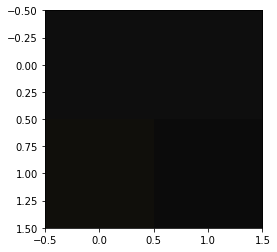

In [94]:
plot_single_image(SIAs[int(1996185)].astype('uint8'))

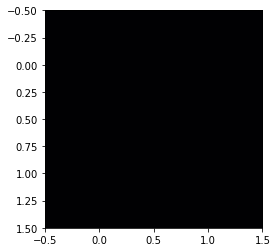

In [86]:
plot_single_image(imgprueba[:2,:2])

In [83]:
plot_single_image(SIAs[int(19961855)].astype(int))

error: OpenCV(4.6.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xd2168eb3::Set<3,4,-1>,struct cv::impl::A0xd2168eb3::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 4 (CV_32S)


In [ ]:
SIA_tot = create_EIA(SIAs,k_x*nx,k_y*ny)

In [ ]:
plot_single_image(SIA_tot.astype('uint8'))

In [ ]:
fila1 = np.hstack((imagenes_test[0],imagenes_test[1]))
fila2 = np.hstack((imagenes_test[2],imagenes_test[3]))
final = np.vstack((fila1,fila2))
plot_single_image(final)

In [ ]:
a = np.arange(16)
print(a)
k_x = 4
k_y = 4
indice = 2 #Son dos que ya puse
fila_1 = np.hstack((a[0],a[1]))
first = True
first2 = True
for x in range(2,k_x):
    fila_1 = np.hstack((fila_1,a[x]))
    indice = indice + 1

for y in range(k_y-1): #Ya forme una fila
    images_for_row = a[indice:indice+k_x]
    print(images_for_row)
    fila_i = np.hstack((images_for_row[0],images_for_row[1]))
    indice = indice + 2
    for i in range(2,k_x):
        fila_i = np.hstack((fila_i,images_for_row[i]))
        indice = indice + 1
    if first2:
        print(fila_1.shape,fila_i.shape)
        EIA = np.vstack((fila_1,fila_i))
        first2 = False
    else:
        EIA = np.vstack((EIA,fila_i))
print(EIA)